# Iris Flower Classification using Supervised Machine Learning

## Introduction

The [Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) is widely used as a beginner's dataset for machine learning purposes.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 

We are going to build a machine learning model to distinguish the species from each other based on the combination of these four features.

## Importing the Libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Dataset

Iris flower data is available in file './data/iris.csv' and the columns are separated by ',' (comma). Let us use [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method to read the file into a DataFrame.

In [26]:
field_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv('./data/iris.csv', names=field_names)

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Exploratory Data Analysis (EDA)

Let us understand the data first and try to gather as many insights from it. 

### DataFrame summary

To start with, let us print a concise summary of the DataFrame using the [info()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method.

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


From the above output we can understand that:

- There are 150 rows and 5 columns.
- Data has only float and object values.
- Data looks very clean and there are no missing values.

### A closer look at the Data

Let us check the first ten rows of the dataset.

In [28]:
print(dataset.head(10))

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


By looking at the above output we can undertand that first 4 columns are input variables and the last coumn (class) is the output variable. We will be using various classification techniques to predict the value of the class column.

### Statistical Summary

Let us take a look at a summary of each attribute.

This includes the count, mean, the min and max values as well as some percentiles.

In [29]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


We can see that all of the numerical values have the same scale (centimeters) and similar ranges between 0 and 8 centimeters.

### Distribution of the class variable

Let us have a look at the distribution of the class variable we are trying to predict.

In [30]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


From the above results we can understand that each class has 50 observations. This indicates that the dataset is balanced.

### Data Visualization

Let us visualize the data to get more insights about the data.

#### Box and Whisker Plots

Let us start with box and whisker plots of the input variables. These plots will help us to get a clear idea of the distribution of input variables.

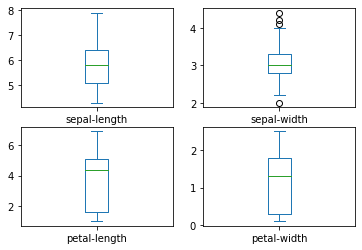

In [31]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

#### Histogram

A histogram can also give us an idea about the distribution of input variables.

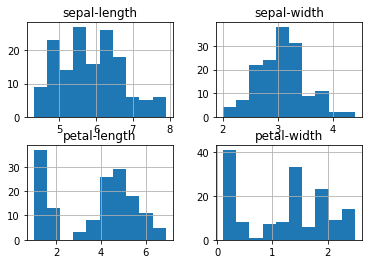

In [32]:
dataset.hist()
plt.show()

#### Scatter Plot Matrix

Let us see the scatterplots of all pairs of attributes. This will help us to get a much better understanding of the relationships between the variables.

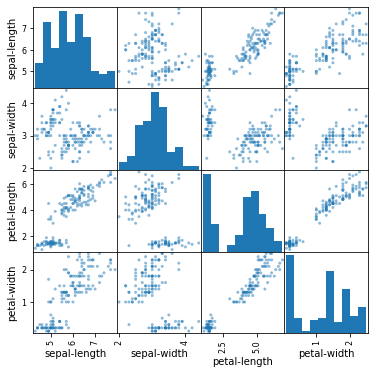

In [33]:
pd.plotting.scatter_matrix(dataset, figsize=(6, 6))
plt.show()

### Insights after EDA

- There are 150 rows and 5 columns.
- Data has only float and object values.
- Data looks very clean and there are no missing values.
- Each class has 50 observations. This indicates that the dataset is balanced.
- Some variables are strongly correlated to class.

## ML Modeling

Let us split the dataset into the training and test sets and then apply different classification algorithms to see which algorithm gives better accuracy.

### Splitting the dataset into Training set and Test set

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Evaluate Models

Let us build and evaluate models using the training set

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# List of models
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier(n_estimators=50)))

# Evaluate each model
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)
DTC: 0.941667 (0.053359)
RFC: 0.950000 (0.040825)


### Model Evaluation

From the above results we can see that Support Vector Machine (SVM) model has the highest accuracy (0.983333) and hence we will choose this as the final model.

Let us check the performance of this SVM model using the test set. We will check the accuracy, confusion matrix and classification report.



In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = SVC(gamma='auto')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)))
print('\n----------------\nConfusion Matrix\n----------------')
print(confusion_matrix(y_test, y_pred))
print('\n---------------------\nClassification Report\n---------------------')
print(classification_report(y_test, y_pred))

Accuracy Score: 0.9666666666666667

----------------
Confusion Matrix
----------------
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

---------------------
Classification Report
---------------------
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



From the above results we can understand that accuracy of the SVM model on test set is 0.966. Confusion matrix and classification matrix also looks excellent.

## Conclusion

We were able to predict the classes of the Iris dataset with very high accuracy.
